## Comparing counties to USA-wide
USA-data: for each bin, a setting of $b = {year, age, yearRx, yearsObserved}$, for a given drug $d$, we obtain the number of people who fit in that bin, $n_{b,d}$ and the number of those people who were prescribed a drug $y_{b,d}$.

USA-model: From there, we model $y_{b,d} \sim Binomial(n_{b,d}, p_{b,d})$, and fit a logistic regression model to calculate $p_{b,d}$ for each bin.

How well does this model fit people by county?

### Goals:
- Accurate drug prediction: if county is an important predictor of drug, but counties are too small, we need to find a way to:
    - Measure similarity between counties
    - Cluster together counties that deviate in the same way, in order to make a model of drug-incidence by region.
- Understanding drivers of systematic trends nation-wide, as another project

### Measuring deviation from USA-model:
Each county $c$, with the  bins defined the same way, has counts $y_{b,d,c}$, $n_{b,d,c}$.  

Evaluating residuals: expected drug prescription is $ \hat{y}_{b,d,c} =  p_{b,d} \cdot n_{b,d,c}$.  



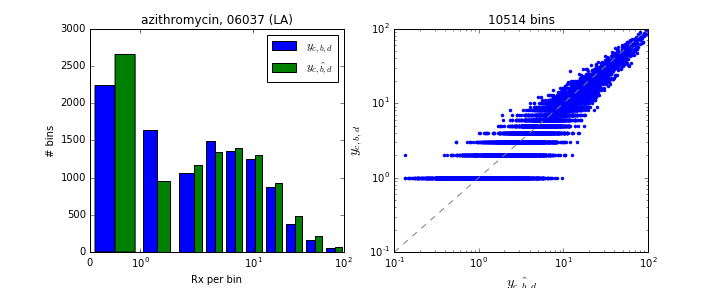

In [9]:
Image(filename='png/bin_variation.png',width=900)

How to measure residuals?  
- **Ratio**: $y_{b,d,c} \over { \hat{y}_{b,d,c} }$ ? --But what about wide variation in $n_{b,d,c}$
- ** $ \hat{p}_{b,d} $ Ratio**: $y_{b,d,c}/n_{b,d,c} \over { p_{b,d,c} }$ -- This is the same as above per bin, but different when summed over bins
- **Standardized residual**:  $y_{b,d,c} - { \hat{y}_{b,d,c} } \over { \hat{var(y_{b,d,c})} }$  --same problem, huge variation between bins.
- **Deviance residual**: $y_{b,d,c} \cdot log( { y_{b,d,c} \over { \hat{y}_{b,d,c} } })$

I settled on the ratio, but I'm not sure.

### Types of deviation:
Which dimension should we calculate deviation **per county** on ?

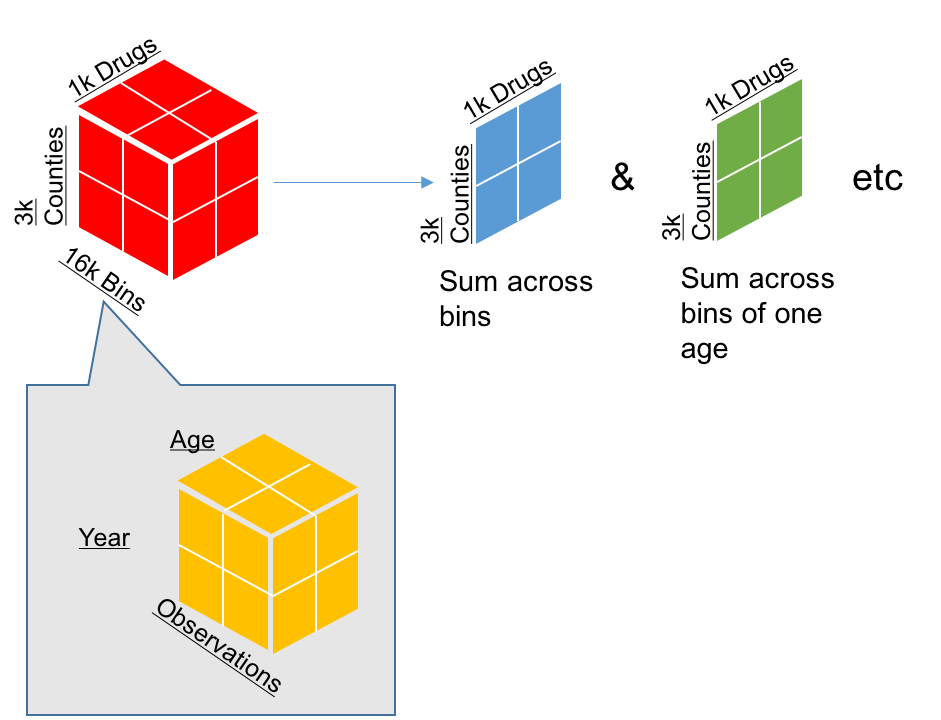

In [8]:
Image(filename='png/dimensions.png',width=600)

#### Per drug:
$R_{d,c}={ total\ observed \over {total\ expected}} ={ {\sum_b y_{b,d,c} } \over {  \sum_b { \hat{y}_{b,d,c} }}}$

Bins with a lot of observed drug or expected drug will dominate this.  Below, a PCA of the matrix of $R_{d,c}$, and the legend

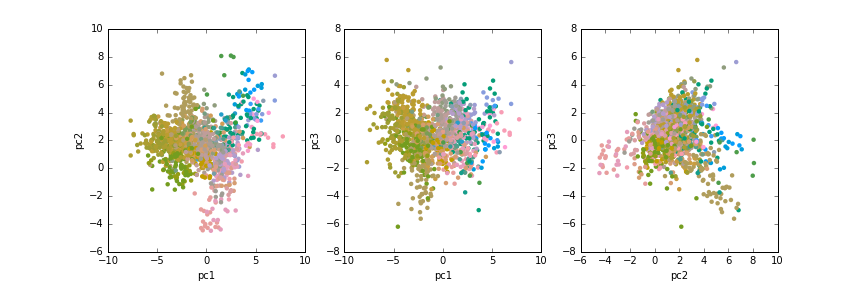

In [12]:
Image(filename='png/sum_bin_drugs.png',width=1000)

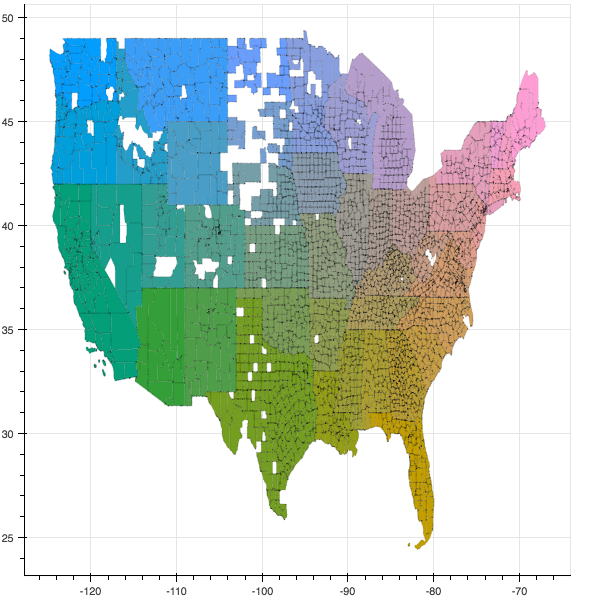

In [20]:
Image(filename='png/usalegend.png',width=500,height=300,unconfined=True)

#### Per age and drug:
Let $b_{age}$ be the set of bins for subjects of a given age.
$R_{age,d,c} ={ {\sum_{b \in b_{age}} y_{b,d,c} } \over {  \sum_{b \in b_{age}} { \hat{y}_{b,d,c} }}}$

Below, conditioned on age, across all bins:

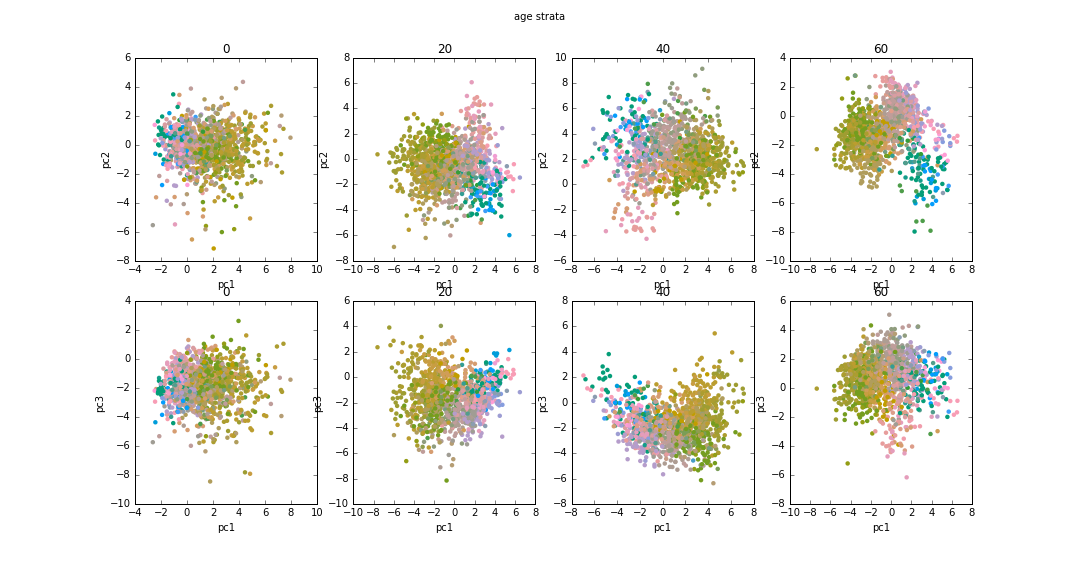

In [31]:
Image(filename='png/age_strata.png',width=1000)

## Comparing drugs to each other by county-residuals
We can compare two drugs to each other in terms of how their residuals co-vary across counties: each drug has a vector $R_d$ of dimension the number of counties we are comparing them across. Here I compared:
- **200** most prescribed drugs 
- across the **315** counties with most drug prescriptions.  
- Redbook gives us drug classes. I took the top **30** most frequent drug classes

Below, the antidepressants are clearly correlated with each other more than all drug pairs:

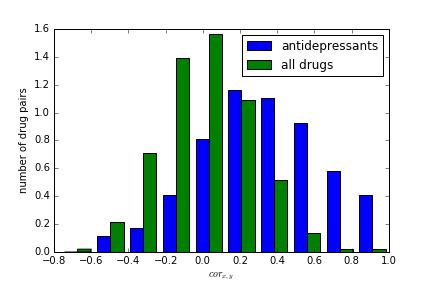

In [21]:
Image(filename='png/drugcor.png',width=500)

The median intra-class correlation of all antidepressants is .33.  To compare drug classes to each other, I calculated all intra-class and inter-class correlations (of the top 30 classes).

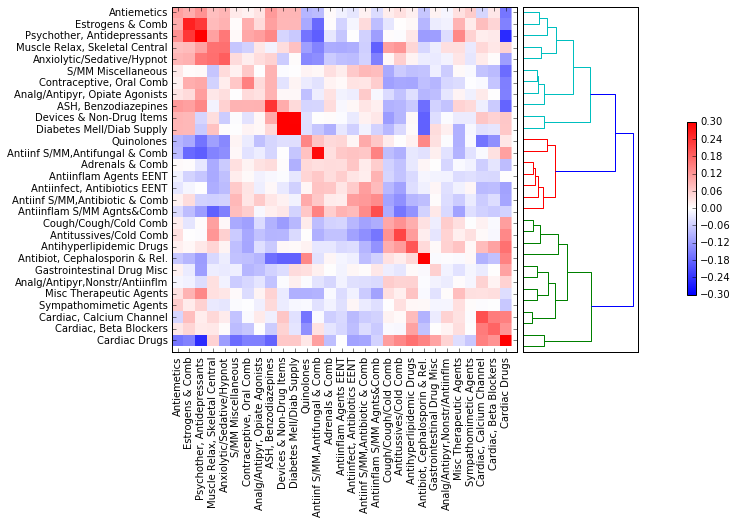

In [26]:
Image(filename='png/correlations_include_overlap.png',width=800)

Since drugs are in more than one class here, I also plotted it removing shared drugs between the classes (here the diagonal is meaningless)

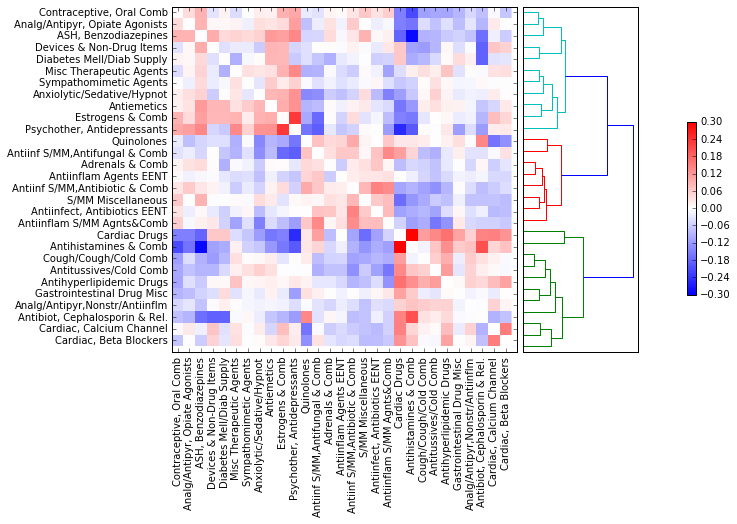

In [29]:
Image(filename='png/correlations_exclude_overlap.png',width=800)

In [2]:
from IPython.display import Image